# Python for Data Science, Level I
### *Session \#9*
---

### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Math Foundations
---

**1. Are each of these factors** *linearly related* **to a house's price?** 

**If they are linearly related, say whether it's positively or negatively.**

- Number of rooms
- Proximity to freeway
- Age of the house
- Square footage
- Proximity to sewage treatment plant

In [ ]:
Number of rooms -- Positive and linear
Proximity to freeway -- Non-linear, since best is close but not too close
Age of the house -- Negative and linear
Square footage -- Positive and linear
Proximity to sewage treatment plant -- Non-linear, since at some point it stops mattering

**2. In the following equation, what is the coefficient and intercept? What does each mean?**

$$Y = 200X + 25$$

In [ ]:
Coefficient: 200
Intercept: 25

The coefficient is the "slope", or how much an incremental increase in X affects Y.

The intercept sets the base rate.

**3. Let's say I estimate houses by \\$100,000 plus \$10 per square foot.** 

**What would the linear equation for that look like?**

In [ ]:
Y = 10X + 100_000 

**4. What would my estimate for a 4000 sq ft house be, according to the model?**

In [4]:
10*4000 + 100_000

140000

**5. Let's say I estimate houses by \\$600,000 minus \$10,000 per year since construction.** 

**What would the linear equation for that look like?**

In [ ]:
Y = -10_000*X + 600_000

**6. What would my estimate for a 24 year-old house be, according to the model?**

In [5]:
-10_000*(24) + 600_000

360000

## II. Basic Linear Regression

### Warm Ups

---

**Setup:**

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn-pastel') 
df = pd.read_csv("housing.csv")

**Create linear model:**
```python
model = LinearRegression()
columns = ['median_income']
model.fit(df[columns], df['median_house_value'])
```

In [8]:
model = LinearRegression()
columns = ['median_income']
model.fit(df[columns], df['median_house_value'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Access coefficients:** `model.coef_`

**Access intercept:** `model.intercept_`

**Make predictions using your linear model:** `predictions = model.predict(df[columns])`

**Plot your data and model:**
```python
plt.scatter(df['median_income'], df['median_house_price'], color='black')
plt.plot(df['median_income'], predictions)
```

### Exercises

---

**1. Look at the** `.coef_` **and** `.intercept_` **for your model.** 

**What would the mathematical equation for this model be?**  

In [13]:
model.coef_

array([41793.8492019])

**2. Use your equation to predict, by hand, how much a house where median income is moderate (ie. a 5)**

**Now use** `model.predict()` **to compute the same thing.**

Hint: `.predict()` expects a row of data, so use [[5]] as input

In [23]:
41793.8*(5) + 45085.6

model.predict([[5]])

array([254054.82271275])

**3. Create a variable** `predictions` **that captures your model's predicted price for each row**

In [25]:
predictions = model.predict(df[columns])

**4. Create a scatter plot with** `median_income` **as the x-values and** `median_house_value` **as y-values**

**Add your model on top with** `.plot()` **, using** `median_income` **as the x-values and** `predictions` **as the y-values**

Hint: Set color='red' on `plt.plot()` for better visibility

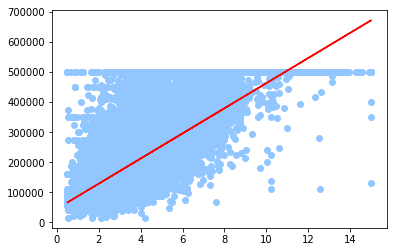

In [27]:
plt.scatter(df['median_income'], df['median_house_value'])
plt.plot(df['median_income'], predictions, color='red')

**5. Create a new variable** `error` **, by subtracting** `median_house_value` **from the array of price** `predictions`

In [29]:
error = predictions - df['median_house_value']

**6. Square the resulting array, then call** `.sum()` **on it.**

**This is the sum of squared error! The line of best fit minimizes this value.**

In [30]:
(error ** 2).sum()

144713469420465.44

## III. Evaluating a Linear Model

### Warm Ups

---

**Import packages:**

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

**Split into feature matrix, target vector:**
```python
columns = ['median_income']
X = df[columns]
y = df['median_home_value']
```

**Split into train/test sets:** 
```python
X_train, X_test, y_train, y_test = train_test_split(X, y)
```

**Fit model to training set:** `model.fit(X_train, y_train)`

### Exercises

---
**1. Create a feature matrix (X) and target vector (y)**

In [35]:
columns = ['total_rooms']
X = df[columns]
y = df['median_house_value']

**2. Use** `train_test_split` **to create X_train, X_test, y_train, y_test**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

**3. Fit the linear model using X_train and y_train. Then create a variable** `predictions` **by calling** `.predict()` **on your X_test**

In [37]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

**4. Call** `mean_absolute_error()` **on** `predictions` **and** `y_test`

In [38]:
mean_absolute_error(predictions, y_test)

89586.17226474204